# Decision Trees and Random Forests
## 1. Load a classification dataset Iris dataset.
## 2. Implement decision tree and random forest classifiers using scikit-learn.
## 3. Evaluate the models, visualize the decision trees, and analyze feature importance.

## Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Loading Dataset 

In [2]:
iris = load_iris()

In [3]:
# dataset description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# dataset size
iris['data'].shape

(150, 4)

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Storing data in DataFrame

In [6]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Preprocessing the Dataset 

In [7]:
# Check for missing values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Ploting BoxPlot for IQR 

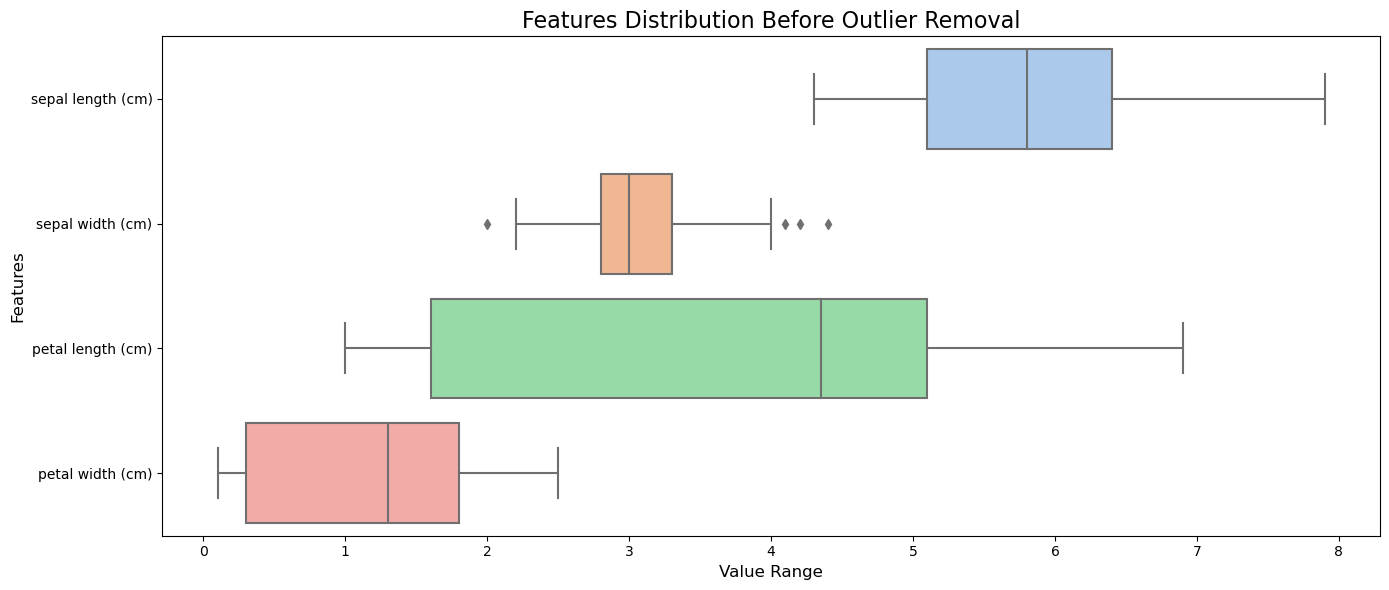

In [8]:
# Visualize boxplots before outlier removal
plt.figure(figsize=(14, 6))
sns.boxplot(data=iris_df[iris.feature_names], orient="h", palette="pastel")
plt.title('Features Distribution Before Outlier Removal', fontsize=16)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
df_clean = iris_df.copy()
for column in iris.feature_names:
    Q1 = iris_df[column].quantile(0.25)
    Q3 = iris_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]    
df_clean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


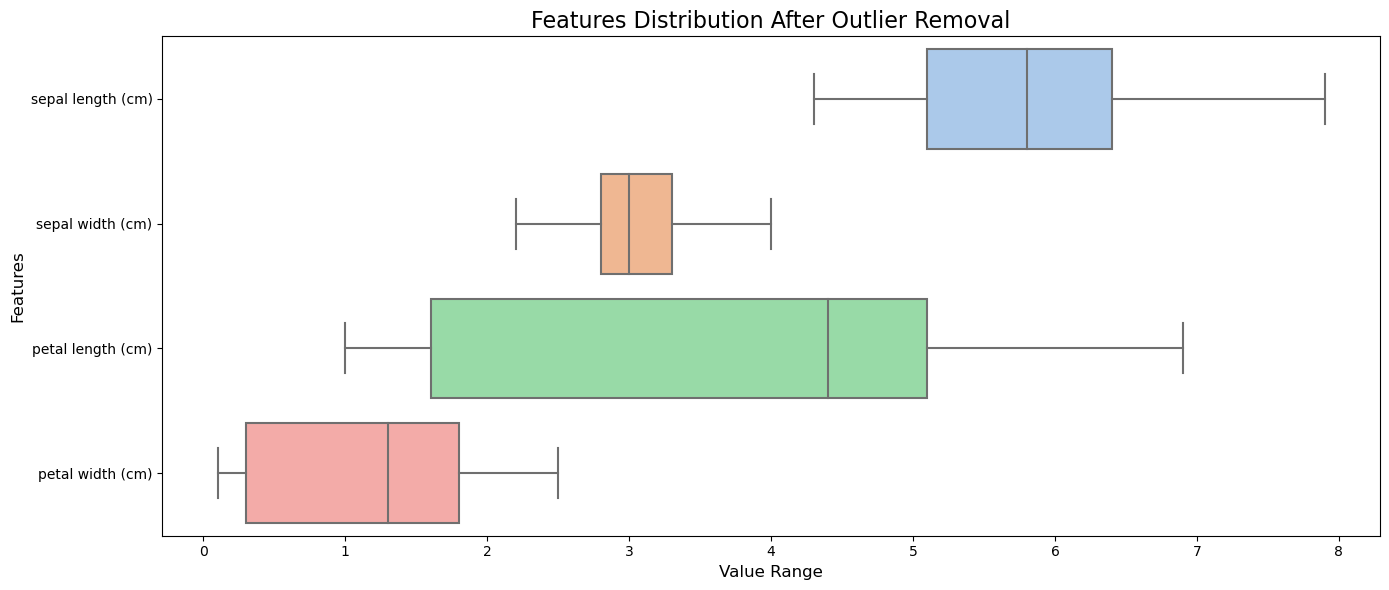

In [10]:
# Visualize boxplots before outlier removal
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[iris.feature_names], orient="h", palette="pastel")
plt.title('Features Distribution After Outlier Removal', fontsize=16)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Spliting of Dataset into train test data

In [11]:
# Split features and target
X = df_clean.drop('target', axis=1)
y = df_clean['target']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling dataset 

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training Decision Tree model  

In [14]:
# Decision Tree with regularization
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

### Training Random Forest model

In [15]:
# Random Forest with regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=5, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, random_state=42)

### Evaluation of Model 

In [16]:
# Evaluate models
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)

#### Tree Graph 

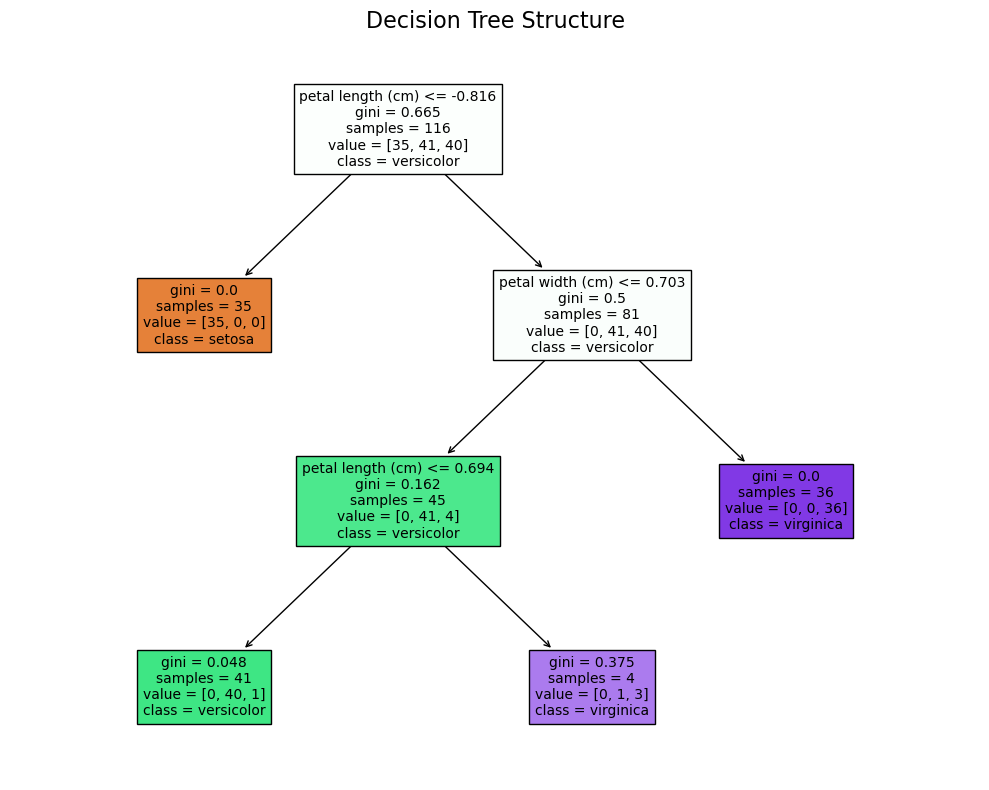

In [17]:
# Visualizations
plt.figure(figsize=(10, 8))

# Decision Tree Visualization
plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names.tolist(), 
    filled=True, 
    fontsize=10
)
plt.title('Decision Tree Structure', fontsize=16)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

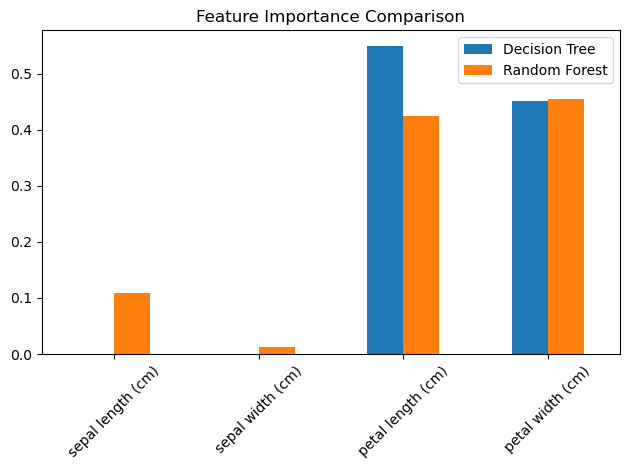

In [18]:
# Feature Importance Comparison
plt.figure(figsize=(14, 10))
importances = pd.DataFrame({
    'Decision Tree': dt.feature_importances_,
    'Random Forest': rf.feature_importances_
}, index=iris.feature_names)
importances.plot(kind='bar')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

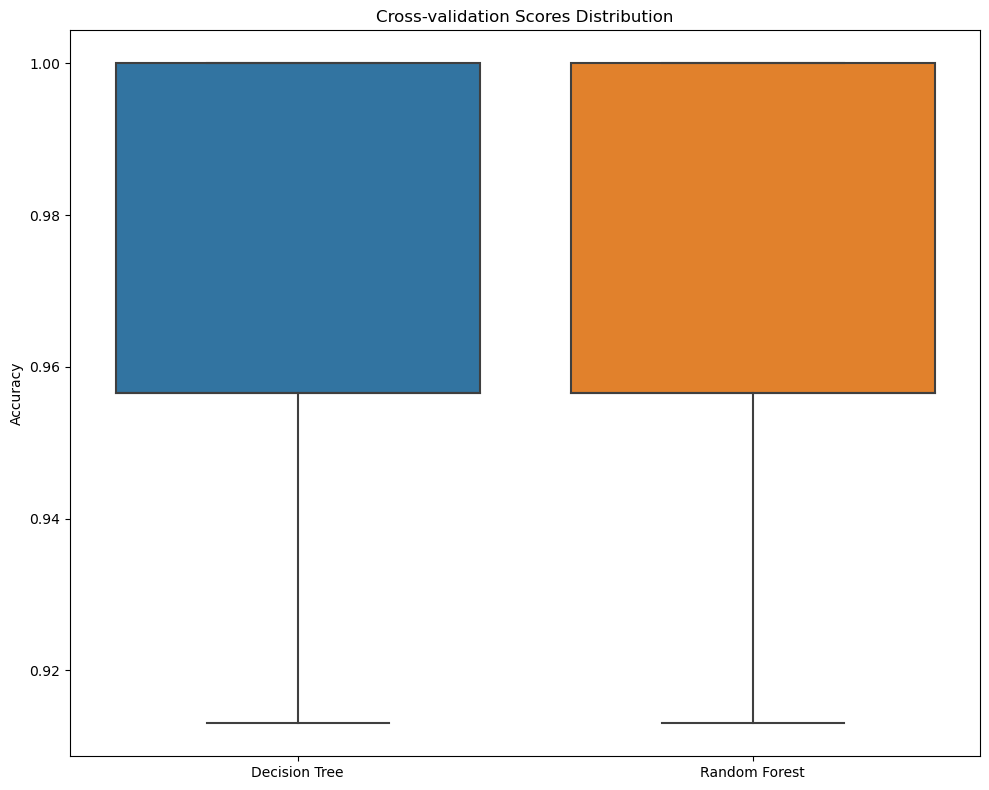

In [19]:
# Model Performance Comparison
plt.figure(figsize=(10, 8))
performance = pd.DataFrame({
    'Decision Tree': dt_scores,
    'Random Forest': rf_scores
})
sns.boxplot(data=performance)
plt.title('Cross-validation Scores Distribution')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

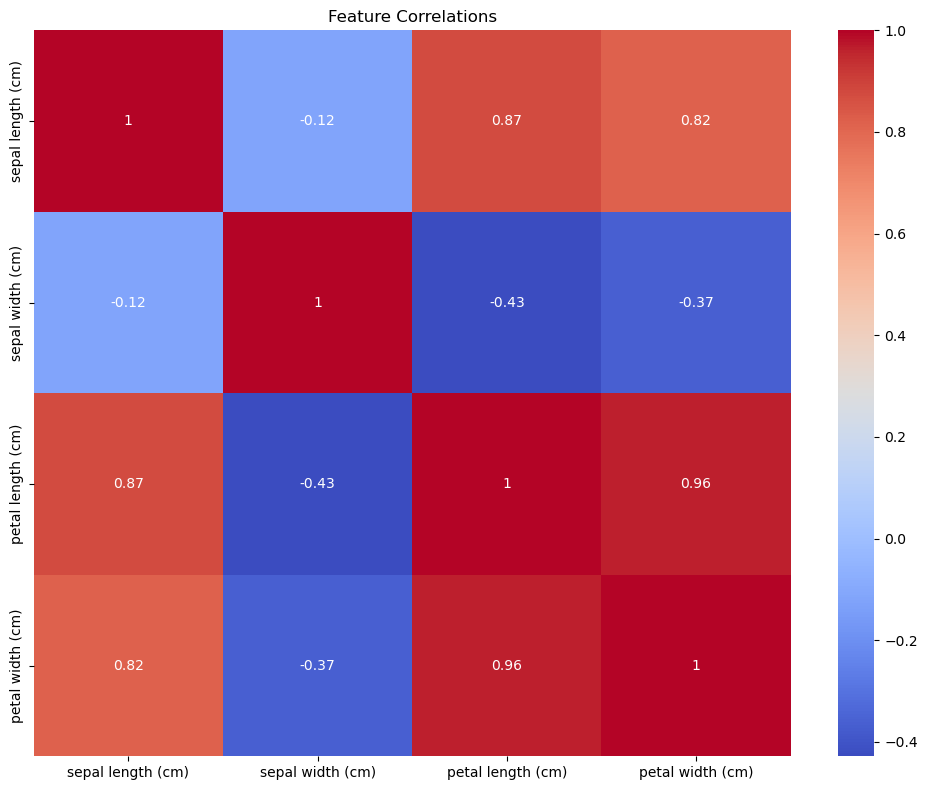

In [20]:
# Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(iris_df[iris.feature_names].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')

plt.tight_layout()
plt.show()

In [21]:
# Print performance metrics
print("\nDecision Tree Performance:")
print(classification_report(y_test, dt.predict(X_test_scaled)))
print("\nRandom Forest Performance:")
print(classification_report(y_test, rf.predict(X_test_scaled)))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

